# Anchors VS Minimal Sufficient Rules

In [1]:
import argparse
import numpy as np
from acv_explainers.utils import generate_dataset
from experiments.utils import feature_performance_metric, prediction_performance_metric   
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
# from skranger.ensemble.classifier import RangerForestClassifier
from sklearn.ensemble import RandomForestRegressor
from acv_explainers.acv_tree import ACVTreeAgnostic
# Necessary packages
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Comparisons of rules on moon data with switch

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument(
  '--data_type',
  choices=['syn1','syn2','syn3','syn4','syn5','syn6', 'syn7', 'syn8', 'syn_moons'],
  default='syn_moons',
  type=str)
parser.add_argument(
  '--train_no',
  help='the number of training data',
  default=10000,
  type=int)
parser.add_argument(
  '--test_no',
  help='the number of testing data',
  default=10000,
  type=int)
parser.add_argument(
  '--dim',
  help='the number of features',
  choices=[11, 100],
  default=100,
  type=int)

args = parser.parse_args([]) 

# Generate dataset
d = args.dim
p = 0.8
mean = np.zeros(d)
coefs = np.ones(d)
# Determinitist covariance
cov = p*np.ones(shape=(d, d)) + 5*np.eye(d)
# b = np.random.randn(d, d)
# cov = np.dot(b, b.T)

x_train, y_train, g_train = generate_dataset (mean, cov, n = args.train_no, 
                                            dim = args.dim, 
                                            data_type = args.data_type, 
                                            seed = 0, reg=True, coefs=coefs)

x_test, y_test, g_test = generate_dataset (mean, cov, n = args.test_no,
                                         dim = args.dim, 
                                         data_type = args.data_type, 
                                         seed = 5, reg=True, coefs=coefs)

# RF training

In [3]:
# minimal number of obersations in each leaf
n = x_train.shape[0]
tn = np.ceil((np.sqrt(n)*np.log(n)**(1.5))/250)
tn

12.0

In [4]:
model = RandomForestClassifier(n_estimators=10, min_samples_leaf=int(tn), max_depth=8, max_features=x_train.shape[1])
for i in range(2):
    model.fit(x_train, y_train)
print('AUC = {}'.format(roc_auc_score(model.predict(x_test), y_test)))

AUC = 0.9934025122726376


### Initialization of the Explainer

In [5]:
acvtree = ACVTreeAgnostic(model, x_train)

100%|██████████| 10/10 [00:00<00:00, 43.96it/s]


# Launch the webAPP ?

- Execute the following code if you wan to run the webapp to easily navigate between the different explanations

In [6]:
max_size = 10000
x_train = pd.DataFrame(x_train[:max_size], columns=['X{}'.format(i) for i in range(x_train.shape[1])])
x_test = pd.DataFrame(x_test[:max_size], columns=['X{}'.format(i) for i in range(x_test.shape[1])])
y_test = pd.DataFrame(y_test[:max_size])
y_train = pd.DataFrame(y_train[:max_size])

- Save the model and data

In [7]:
# import acv_app
# import os

# acv_app.compile_acv(model, x_train, y_train, x_test, y_test, path=os.getcwd())

- Launch the webapp

In [8]:
# # Give the path where the model and data are saved
# acv_app.run_webapp(pickle_path=os.getcwd())

# Plot the Data

In [9]:
data_plots = x_train.copy()
data_plots['label'] = y_train.values.reshape(-1)

In [10]:
c = ['#3e82fc', '#ff073a']

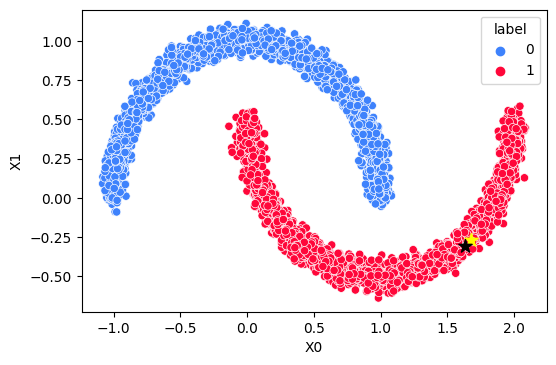

In [11]:
plt.figure(dpi=100)
sns.scatterplot(x='X0', y='X1', hue='label', data=data_plots[data_plots['X2']>=0], palette=c)

# idx = np.random.randint(0, x_test.shape[0])
idx = 9651
# print(idx)
nearest = (x_test.values[:, 0] <= x_test.values[idx, 0] + 0.05)*(x_test.values[:, 0] >= x_test.values[idx, 0] - 0.05) *\
(x_test.values[:, 1] <= x_test.values[idx, 1] + 0.05)*(x_test.values[:, 1] >= x_test.values[idx, 1] - 0.05)\
*(x_test.values[:, 2] * x_test.values[idx, 2]>=0)


idx_nb = np.argwhere(nearest==1).reshape(-1)[0]
plt.scatter(x_test.values[idx][0], x_test.values[idx][1], marker='*', c = 'yellow', s=100)

plt.scatter(x_test.values[idx_nb][0], x_test.values[idx_nb][1], marker='*', c = 'black', s=100)

- The instance chosen for the explanations

In [12]:
x_test.values[idx]

array([ 1.67439471, -0.26979243,  1.06303849,  3.92055085,  0.49334297,
       -0.50883612, -0.42394467,  2.4325337 , -1.92190472,  1.24244747,
       -0.16119342, -0.71275924, -1.17896172,  2.36634543, -3.30530329,
       -1.96068904,  4.11666422, -0.13520768,  2.15905263,  3.25482038,
        0.16177298, -1.26488742, -1.8592163 ,  3.38733193, -0.34193294,
        7.47189958,  1.59151088, -2.0369618 ,  3.99079836, -0.64463498,
       -0.32401052,  2.00615406,  3.45393268,  3.36307972, -3.1646529 ,
       -3.37671637,  1.58560491, -1.44531377,  1.47339926,  0.27172279,
        4.58288468,  1.52563298,  2.56149188,  0.75127796, -1.34245524,
       -0.55761902, -0.26078379, -2.56814442,  2.03256965,  2.41558094,
        4.14531634,  2.66460813, -2.38458945, -0.59961032, -0.98912788,
       -2.06564496, -0.40826545,  2.65046522,  0.72150977, -3.64032238,
        1.23062854,  2.07794898,  4.90993771,  5.74628147,  3.84770882,
        2.00903962,  4.93511699,  0.885643  ,  2.11282047, -1.59

- The nearest point of the chosen instance 

In [13]:
x_test.values[idx_nb]

array([ 1.63460146, -0.3075748 ,  2.77643162, -0.60429912,  0.705768  ,
        3.96038354,  3.07034518, -2.34541456, -0.76103032,  3.1332673 ,
       -0.02220128, -1.14357467, -0.1509417 , -4.61118803, -0.93874519,
        2.28890444, -1.2788214 , -0.66889613, -2.52678517,  1.84634541,
        0.38893071, -1.82960293, -2.67339616,  1.25881504,  0.35801684,
        0.61259995, -1.46322978,  1.71448975, -2.27751508,  0.11977587,
        3.421759  , -0.41863905, -1.9039685 ,  1.2720527 ,  1.3560161 ,
        0.68824279, -0.0915587 ,  1.89067974, -2.30235762, -0.7693816 ,
       -0.69021862, -0.02527066, -3.42119891,  1.08731886,  1.55316537,
       -2.6590467 ,  2.06308733, -2.13517025,  2.89508873, -4.35551132,
        0.86677563, -1.60440824, -1.70431343,  2.05104602,  3.61280644,
       -0.31868703, -1.40291808,  0.12905915,  2.51558917, -0.0915692 ,
       -0.45445265,  1.26754582, -0.97335973,  0.04335494,  1.24164742,
       -0.71000355, -0.88586509, -2.78154677, -0.67946265,  0.44

# Anchors Fitting

In [14]:
from anchor import anchor_tabular

In [15]:
columns = ['X{}'.format(i) for i in range(x_train.shape[1])]

In [16]:
explainer = anchor_tabular.AnchorTabularExplainer(
    ['0', '1'],
    columns,
    x_train.values[:5000])

#### Rules of the reference point

In [17]:
# idx = 607
import time
t0 = time.perf_counter()
exp = explainer.explain_instance(x_test.values[idx], model.predict, threshold=0.95, delta=0.05, max_anchor_size=5)
t1 = time.perf_counter()
print(t1 - t0)
exp.names()

50.48198065600013


['X0 > 1.03', 'X2 > 0.02', 'X1 <= -0.21']

In [18]:
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

Anchor: X0 > 1.03 AND X2 > 0.02 AND X1 <= -0.21
Precision: 1.00
Coverage: 0.06


#### Rules of the nearest point

In [19]:
import time
t0 = time.perf_counter()
exp = explainer.explain_instance(x_test.values[idx_nb], model.predict, threshold=0.95, delta=0.05, max_anchor_size=30)
t1 = time.perf_counter()
print(t1 - t0)
exp.names()

56.578024928000104


['X8 > -1.61', 'X92 > 1.68', 'X0 > -0.03', 'X2 > 0.02', 'X1 <= -0.21']

In [20]:
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

Anchor: X8 > -1.61 AND X92 > 1.68 AND X0 > -0.03 AND X2 > 0.02 AND X1 <= -0.21
Precision: 1.00
Coverage: 0.03


**Important**: Re-run the previous cell to see the instability of Anchors

- Plot of the rules of the reference point with anchors

In [21]:
X = x_train.values.copy()
plot_step = 0.01

(-1.5, 2.0)

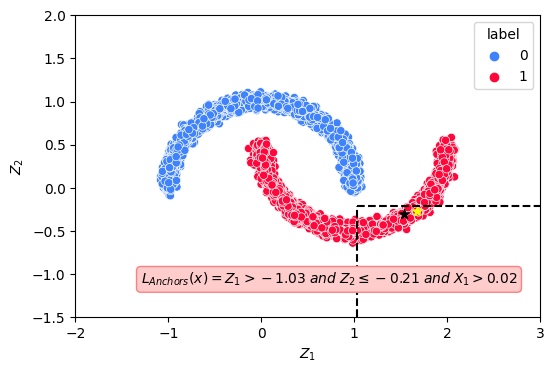

In [22]:
plt.figure(dpi=100)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plot_X = np.c_[xx.ravel(), yy.ravel()]

def rule(X):
    Y = []
    A = []
    j = 0
    for i in range(X.shape[0]):
        if X[i, 1] <=  -0.21 and 1.03  <= X[i, 0]:
            j += 1
            Y.append(0)
        elif X[i, 1] >=  -0.0323284026235342 and 1.4608486890792847  <= X[i, 0]:
            Y.append(1)
        elif X[i, 1] <=  -0.0323284026235342 and 1.4608486890792847  >= X[i, 0]:
            Y.append(1)
        else:
            Y.append(4)
    return np.array(Y), np.array(A)

Z, A = rule(plot_X)
Z = Z.reshape(xx.shape)
# A = A.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, colors='white', linestyles='dashed')
# cs = plt.contourf(xx, yy, A)
# plt.colorbar()
sns.scatterplot(x='X0', y='X1', hue='label', data=data_plots[data_plots["X2"]>=0], palette=c)
plt.scatter(x_test.values[idx][0], x_test.values[idx][1], marker='*', c ='yellow', s=50)
plt.scatter(x_test.values[idx_nb][0]-0.1, x_test.values[idx_nb][1], marker='*', c ='black', s=50)
x = np.linspace(1.03, 3, 100)
y = np.ones(100)*(-0.21)
plt.plot(x, y, linestyle='dashed', color='black')
# plt.plot(-2*np.ones(100), np.linspace(-1.5, y[0], 100), linestyle='dashed', color='black')

plt.text(x[20]-0.7, y[20]-0.9, r"$L_{Anchors}(x)=  Z_1 > -1.03 \; and \; Z_2 \leq -0.21 \; and \; X_1 > 0.02$",
         horizontalalignment='center', fontsize=10, bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))


x = np.ones(100)*1.03
y = np.linspace(-1.5, -0.21, 100)
plt.plot(x, y, linestyle='dashed', color='black')

# plt.text(x[20]+0.8, y[20]+0.9, r"$L_{S_2}(x)=  Z_2 \geq 1.46 \; and \; X_1 > 0$",
#          verticalalignment='center', fontsize=8, rotation='vertical', bbox=dict(boxstyle="round",
#                    ec=(1., 0.5, 0.5),
#                    fc=(1., 0.8, 0.8),
#                    ))

plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)

# Sufficient Explanations and Sufficient Rules

### 1- Sufficient Explanations

In [23]:
sufficient_coal, sdp_coal, sdp_global = acvtree.sufficient_coal_rf(x_test.values[idx:idx+1], y_test.values[idx:idx+1].reshape(-1).astype(np.double),
                                                                x_train.values[:10000], y_train.values[:10000].reshape(-1).astype(np.double),
                                                                stop=False, global_proba=0.95, classifier=1, t=10)
sufficient_coal[0].pop(0)
sufficient_coal = sufficient_coal[0]
sufficient_coal

100%|██████████| 10/10 [02:51<00:00, 17.16s/it]


[[2, 1], [2, 0]]

In [24]:
S0 = sufficient_coal[0]
S1 = sufficient_coal[1]

In [25]:
print('Index of the Sufficient Explanations X_{}, X_{}'.format(S0, S1))

Index of the Sufficient Explanations X_[2, 1], X_[2, 0]


### 2- Sufficient Rules

In [26]:
pi = 0.9

In [27]:
# Rule by SDP of the reference point with S0
sdp, rules, sdp_all, rules_data = acvtree.compute_sdp_maxrules(x_test.values[idx:idx+1], y_test.values.reshape(-1)[idx:idx+1].astype(np.double),
                                              x_train.values[:10000], y_train.values.reshape(-1)[:10000].astype(np.double), S=[S0],
                                      classifier=1, t=10, pi=pi)


rule = rules[0]
columns = [x_train.columns[i] for i in range(x_train.shape[1])]
rule_string = ['{} <= {} <= {}'.format(rule[i, 0] if rule[i, 0] > -1e+10 else -np.inf, columns[i],
                                       rule[i, 1] if rule[i, 1] < 1e+10 else +np.inf) for i in S0]
rule_string = ' and '.join(rule_string)

print('The Sufficient rule when S={} is \n= {}'.format(S0, rule_string))

# Rule by SDP of the reference point with S1
sdp, rules, sdp_all, rules_data = acvtree.compute_sdp_maxrules(x_test.values[idx:idx+1], y_test.values.reshape(-1)[idx:idx+1].astype(np.double),
                                              x_train.values[:10000], y_train.values.reshape(-1)[:10000].astype(np.double), S=[S1],
                                      classifier=1, t=10, pi=pi, min_node_size=tn)


rule = rules[0]
columns = [x_train.columns[i] for i in range(x_train.shape[1])]
rule_string = ['{} <= {} <= {}'.format(rule[i, 0] if rule[i, 0] > -1e+10 else -np.inf, columns[i],
                                       rule[i, 1] if rule[i, 1] < 1e+10 else +np.inf) for i in S1]
rule_string = ' and '.join(rule_string)


# Rule by SDP of the nearest point with S1
print('The Sufficient rule when S={} is \n= {}'.format(S1, rule_string))


The Sufficient rule when S=[2, 1] is 
= 0.027511997148394585 <= X2 <= inf and -inf <= X1 <= -0.02091525960713625
The Sufficient rule when S=[2, 0] is 
= 0.0663125105202198 <= X2 <= inf and 1.4678153991699219 <= X0 <= inf


#### Rule of the nearest point 

In [28]:
# Rule by SDP of the nearest point with S0
sufficient_coal, sdp_coal, sdp_global = acvtree.sufficient_coal_rf(x_test.values[idx_nb:idx_nb+1], y_test.values[idx_nb:idx_nb+1].reshape(-1).astype(np.double),
                                                                x_train.values[:10000], y_train.values[:10000].reshape(-1).astype(np.double),
                                                                stop=False, global_proba=0.95, classifier=1, t=10)
sufficient_coal[0].pop(0)
sufficient_coal = sufficient_coal[0]
sufficient_coal

S0 = sufficient_coal[0]
S1 = sufficient_coal[1]

sdp, rules, sdp_all, rules_data = acvtree.compute_sdp_maxrules(x_test.values[idx_nb:idx_nb+1], y_test.values.reshape(-1)[idx_nb:idx_nb+1].astype(np.double),
                                              x_train.values[:10000], y_train.values.reshape(-1)[:10000].astype(np.double), S=[S0],
                                      classifier=1, t=10, pi=pi)


rule = rules[0]
columns = [x_train.columns[i] for i in range(x_train.shape[1])]
rule_string = ['{} <= {} <= {}'.format(rule[i, 0] if rule[i, 0] > -1e+10 else -np.inf, columns[i],
                                       rule[i, 1] if rule[i, 1] < 1e+10 else +np.inf) for i in S0]
rule_string = ' and '.join(rule_string)

# Rule by SDP of the nearest point with S1
print('The Sufficient rule when S={} is \n= {}'.format(S0, rule_string))

sdp, rules, sdp_all, rules_data = acvtree.compute_sdp_maxrules(x_test.values[idx_nb:idx_nb+1], y_test.values.reshape(-1)[idx_nb:idx_nb+1].astype(np.double),
                                              x_train.values[:10000], y_train.values.reshape(-1)[:10000].astype(np.double), S=[S1],
                                      classifier=1, t=10, pi=pi, min_node_size=tn)

rule = rules[0]
columns = [x_train.columns[i] for i in range(x_train.shape[1])]
rule_string = ['{} <= {} <= {}'.format(rule[i, 0] if rule[i, 0] > -1e+10 else -np.inf, columns[i],
                                       rule[i, 1] if rule[i, 1] < 1e+10 else +np.inf) for i in S1]
rule_string = ' and '.join(rule_string)


# Rule by SDP of the nearest point with S1
print('The Sufficient rule when S={} is \n= {}'.format(S1, rule_string))


100%|██████████| 10/10 [02:53<00:00, 17.35s/it]


The Sufficient rule when S=[2, 1] is 
= 0.027511997148394585 <= X2 <= inf and -inf <= X1 <= -0.02091525960713625
The Sufficient rule when S=[2, 0] is 
= 0.0663125105202198 <= X2 <= inf and 1.4678153991699219 <= X0 <= inf


### 3- Plot the rules

(-1.5, 2.0)

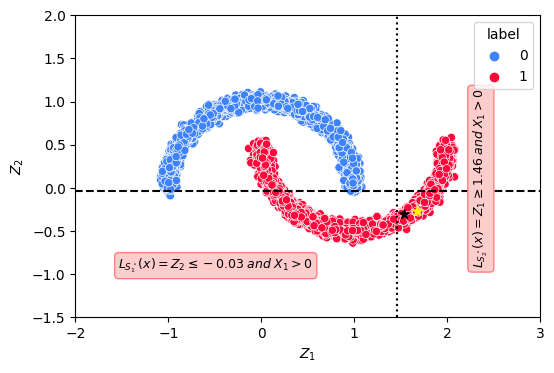

In [30]:
plt.figure(dpi=100)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plot_X = np.c_[xx.ravel(), yy.ravel()]

def rule(X):
    Y = []
    A = []
    j = 0
    for i in range(X.shape[0]):
        if X[i, 1] <=  -0.02091525960713625 and  1.4678153991699219  <= X[i, 0]:
            j += 1
            Y.append(0)
        elif X[i, 1] >=  -0.02091525960713625 and  1.4678153991699219  <= X[i, 0]:
            Y.append(1)
        elif X[i, 1] <=  -0.02091525960713625 and  1.4678153991699219  >= X[i, 0]:
            Y.append(1)
        else:
            Y.append(4)
    return np.array(Y), np.array(A)

Z, A = rule(plot_X)
Z = Z.reshape(xx.shape)
# A = A.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, colors='white', linestyles='dashed')
# cs = plt.contourf(xx, yy, A)
# plt.colorbar()
sns.scatterplot(x='X0', y='X1', hue='label', data=data_plots[data_plots["X2"]>=0], palette=c)
plt.scatter(x_test.values[idx][0], x_test.values[idx][1], marker='*', c ='yellow', s=50)
plt.scatter(x_test.values[idx_nb][0]-0.1, x_test.values[idx_nb][1], marker='*', c ='black', s=50)
x = np.linspace(-2, 3, 100)
y = np.ones(100)*(-0.0323284026235342)
plt.plot(x, y, linestyle='dashed', color='black')
# plt.plot(-2*np.ones(100), np.linspace(-1.5, y[0], 100), linestyle='dashed', color='black')

plt.text(x[20]+0.5, y[20]-0.9, r"$L_{S^\star_1}(x)=  Z_2 \leq -0.03 \; and \; X_1 > 0$",
         horizontalalignment='center', fontsize=9, bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))


x = np.ones(100)*1.4608486890792847 
y = np.linspace(-1.5, 2, 100)
plt.plot(x, y, linestyle='dotted', color='black')

plt.text(x[20]+0.8, y[20]+0.9, r"$L_{S^\star_2}(x)=  Z_1 \geq 1.46 \; and \; X_1 > 0$",
         verticalalignment='center', fontsize=9, rotation='vertical', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)